In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import math
import pandas as pd
import numpy as np
from matplotlib.lines import Line2D
import seaborn as sns
import pandas as pd

def read_csv_files(directory):
    csv_files = []
    print(f"Checking files in directory: {directory}")
    for filename in os.listdir(directory):
        print(f"Found file: {filename}")
        if filename.startswith("sub") and filename.endswith(".csv"):
            print(f"Reading CSV file: {filename}")
            file_path = os.path.join(directory, filename)
            df = pd.read_csv(file_path)
            csv_files.append(df)
        else:
            print(f"Skipping file: {filename}")
    return csv_files

def summarySE(df, measurevar, groupvars, na_rm=True):
    """Compute mean, standard error, and count of observations for each group."""
    # Group by the specified columns
    grouped = df.groupby(groupvars).agg(
        mean=(measurevar, 'mean'),
        count=(measurevar, 'size'),
        std=(measurevar, 'std')
    ).reset_index()
    
    # Calculate standard error
    grouped['se'] = grouped['std'] / np.sqrt(grouped['count'])
    
    # Remove rows with NaNs if na_rm is True
    if na_rm:
        grouped = grouped.dropna()
    
    return grouped

# Set the directory path
directory = 'data'

# Call the function and get the list of dataframes
dataframes = read_csv_files(directory)

# Display the first few rows of each DataFrame
for i, df in enumerate(dataframes):
    print(f"First few rows of DataFrame {i+1}:")
    print(df.head())
    print("\n")


Checking files in directory: data
Found file: Table_CrypticCreaturesShiftRelative_controls_YaleCohort.csv
Skipping file: Table_CrypticCreaturesShiftRelative_controls_YaleCohort.csv
Found file: .DS_Store
Skipping file: .DS_Store
Found file: CrypticCreaturesBayesianLearner_relativeID_controls.csv
Skipping file: CrypticCreaturesBayesianLearner_relativeID_controls.csv
Found file: avg_confidence_deviation_plot.png
Skipping file: avg_confidence_deviation_plot.png
Found file: CrypticCreaturesBayesianLearner_relativeShift_OCD.csv
Skipping file: CrypticCreaturesBayesianLearner_relativeShift_OCD.csv
Found file: Table_CrypticCreaturesShiftRelative_YaleCohort.csv
Skipping file: Table_CrypticCreaturesShiftRelative_YaleCohort.csv
Found file: test.csv
Skipping file: test.csv
Found file: Table_CrypticCreatures_patients_YaleCohort.csv
Skipping file: Table_CrypticCreatures_patients_YaleCohort.csv
Found file: CrypticCreaturesBayesianLearner_relativeED.csv
Skipping file: CrypticCreaturesBayesianLearner_re

In [2]:
# Set directory
os.chdir("data")

# Load data
CrypticCreatures = pd.read_csv("Table_CrypticCreatures_YaleCohort.csv")
CrypticCreature_relativeShift = pd.read_csv("Table_CrypticCreaturesShiftRelative_YaleCohort.csv")
CrypticCreatures_patients_relativeShift = pd.read_csv("Table_CrypticCreaturesShiftRelative_patients_YaleCohort.csv")
CrypticCreatures_patients_relativeShift = CrypticCreatures_patients_relativeShift.sort_values(by=['id', 'nTrial_rel'])
CrypticCreatures_controls_relativeShift = pd.read_csv("Table_CrypticCreaturesShiftRelative_controls_YaleCohort.csv")
CrypticCreatures_controls_relativeShift = CrypticCreatures_controls_relativeShift.sort_values(by=['id', 'nTrial_rel'])

CrypticCreatures_BayesianLearner = pd.read_csv("CrypticCreatures_BayesianLearner.csv")
CrypticCreatures_BayesianLearner_patients_relativeShift = pd.read_csv("CrypticCreaturesBayesianLearner_relativeShift_OCD.csv")
CrypticCreatures_BayesianLearner_patients_relativeShift = CrypticCreatures_BayesianLearner_patients_relativeShift.sort_values(by=['id', 'nTrial_rel'])
CrypticCreatures_BayesianLearner_controls_relativeShift = pd.read_csv("CrypticCreaturesBayesianLearner_relativeShift_controls.csv")
CrypticCreatures_BayesianLearner_controls_relativeShift = CrypticCreatures_BayesianLearner_controls_relativeShift.sort_values(by=['id', 'nTrial_rel'])


In [3]:
print(CrypticCreatures_BayesianLearner.head())

   run  task_id  relDim  ruleChange  chosen_outcome    RT  confidence  \
0    1        1       4           0               0  3570           0   
1    1        1       4           0               1  1974          41   
2    1        1       4           0               1  2589          66   
3    1        1       4           0               1  3206          73   
4    1        1       4           0               1  3390          76   

   confidenceRT  id  trial  ...  prev_entropy  prev_BLR_confidence  \
0          4861   2      1  ...           NaN                  NaN   
1          3478   2      2  ...           1.0                 50.0   
2          1862   2      3  ...           1.0                 50.0   
3          1751   2      4  ...           1.0                 50.0   
4          2634   2      5  ...           1.0                 50.0   

   norm_confidence  norm_BLR_confidence  norm_prev_BLR_confidence  \
0             0.00                  0.5                       NaN   
1 

In [4]:
# Assuming CrypticCreatures_patients_relativeShift is a DataFrame
Cryptic_mean_acc_ID_patients = summarySE(CrypticCreatures_patients_relativeShift, 'mean_accuracy_id', ['nTrial_rel'])
Cryptic_mean_acc_ED_patients = summarySE(CrypticCreatures_patients_relativeShift, 'mean_accuracy_ed', ['nTrial_rel'])
Cryptic_mean_acc_patients = summarySE(CrypticCreatures_patients_relativeShift, 'mean_accuracy', ['nTrial_rel'])

Cryptic_mean_conf_ID_patients = summarySE(CrypticCreatures_patients_relativeShift, 'mean_confidence_id', ['nTrial_rel'])
Cryptic_mean_conf_ED_patients = summarySE(CrypticCreatures_patients_relativeShift, 'mean_confidence_ed', ['nTrial_rel'])
Cryptic_mean_conf_patients = summarySE(CrypticCreatures_patients_relativeShift, 'mean_confidence', ['nTrial_rel'])

#Cryptic_mean_entr_ID_patients = summarySE(CrypticCreatures_BayesianLearner_patients_relativeID, 'mean_entropy_id', ['nTrial_rel'])
#Cryptic_mean_entr_ED_patients = summarySE(CrypticCreatures_BayesianLearner_patients_relativeED, 'mean_entropy_ed', ['nTrial_rel'])
Cryptic_mean_entr_patients = summarySE(CrypticCreatures_BayesianLearner_patients_relativeShift, 'entropy', ['nTrial_rel'])
Cryptic_mean_entr_controls = summarySE(CrypticCreatures_BayesianLearner_controls_relativeShift, 'entropy', ['nTrial_rel'])

Cryptic_mean_sumprior_patients = summarySE(CrypticCreatures_BayesianLearner_patients_relativeShift, 'sum_prior_chosen_features', ['nTrial_rel'])
Cryptic_mean_sumprior_controls = summarySE(CrypticCreatures_BayesianLearner_controls_relativeShift, 'sum_prior_chosen_features', ['nTrial_rel'])

Cryptic_mean_BLR_confidence_patients = summarySE(CrypticCreatures_BayesianLearner_patients_relativeShift, 'BLR_confidence', ['nTrial_rel'])
Cryptic_mean_BLR_confidence_controls = summarySE(CrypticCreatures_BayesianLearner_controls_relativeShift, 'BLR_confidence', ['nTrial_rel'])

Cryptic_mean_signed_confidence_deviation_patients = summarySE(CrypticCreatures_BayesianLearner_patients_relativeShift, 'signed_confidence_deviation', ['nTrial_rel'])
Cryptic_mean_signed_confidence_deviation_controls = summarySE(CrypticCreatures_BayesianLearner_controls_relativeShift, 'signed_confidence_deviation', ['nTrial_rel'])

Cryptic_mean_signed_prior_deviation_patients = summarySE(CrypticCreatures_BayesianLearner_patients_relativeShift, 'signed_prior_deviation', ['nTrial_rel'])
Cryptic_mean_signed_prior_deviation_controls = summarySE(CrypticCreatures_BayesianLearner_controls_relativeShift, 'signed_prior_deviation', ['nTrial_rel'])

print(CrypticCreatures_BayesianLearner_patients_relativeShift)

     id  task_id     shift_type  nTrial_rel  patientstatus  \
0     2        1  general_shift          -5              1   
1     2        1  general_shift          -4              1   
2     2        1  general_shift          -3              1   
3     2        1  general_shift          -2              1   
4     2        1  general_shift          -1              1   
..   ..      ...            ...         ...            ...   
314  70        1  general_shift           1              1   
315  70        1  general_shift           2              1   
316  70        1  general_shift           3              1   
317  70        1  general_shift           4              1   
318  70        1  general_shift           5              1   

     prev_BLR_confidence  prev_entropy  BLR_confidence       entropy  \
0                  81.25  3.750000e-01            87.5  2.500000e-01   
1                  87.50  2.500000e-01            87.5  2.500000e-01   
2                  87.50  2.500000e-01 

In [5]:
# Create a column for feedback type (1 for correct, 0 for incorrect)
CrypticCreatures['feedback'] = CrypticCreatures['chosen_outcome'].apply(lambda x: 1 if x == 'correct' else 0)

# Create lagged columns for feedback and confidence
CrypticCreatures['prev_feedback'] = CrypticCreatures['feedback'].shift(1)
CrypticCreatures['prev_confidence'] = CrypticCreatures['confidence'].shift(1)

# Filter out the first trial as it has no previous feedback
CrypticCreatures = CrypticCreatures.dropna(subset=['prev_feedback', 'prev_confidence'])


In [6]:
def calculate_summary(df, measurevar, groupvar):
    """
    Calculate mean, standard error, and count for a given measure variable.
    """
    summary = df.groupby(groupvar).agg(
        mean=(measurevar, 'mean'),
        count=(measurevar, 'size'),
        std=(measurevar, 'std')
    ).reset_index()
    summary['stderr'] = summary['std'] / np.sqrt(summary['count'])
    return summary

# data frames
controls_df = CrypticCreatures_controls_relativeShift
patients_df = CrypticCreatures_patients_relativeShift

# Merge controls dataset based on 'nTrial_rel' and 'id'
controls_merged_df = pd.merge(
    CrypticCreatures_BayesianLearner_controls_relativeShift,
    controls_df,
    on=['nTrial_rel', 'id'],  # Merge on both nTrial_rel and id
    how='inner'  # Use inner join to ensure matching nTrial_rel and id
)

# Merge patients dataset based on 'nTrial_rel' and 'id'
patients_merged_df = pd.merge(
    CrypticCreatures_BayesianLearner_patients_relativeShift,
    patients_df,
    on=['nTrial_rel', 'id'],  # Merge on both nTrial_rel and id
    how='inner'  # Use inner join to ensure matching nTrial_rel and id
)
# List of measure variables for controls and patients
measure_vars = [
    'change_in_mean_accuracy', 'change_in_mean_accuracy_abs', 
    'change_in_mean_accuracy_ed', 'change_in_mean_accuracy_abs_ed', 
    'change_in_mean_accuracy_id', 'change_in_mean_accuracy_abs_id',
    'change_in_mean_confidence', 'change_in_mean_confidence_abs',
    'change_in_mean_confidence_ed', 'change_in_mean_confidence_abs_ed',
    'change_in_mean_confidence_id', 'change_in_mean_confidence_abs_id',
    'signed_confidence_deviation','signed_prior_deviation','confidence','BLR_confidence'
    
]

# Calculate summaries for controls and patients
summary_controls = {var: calculate_summary(controls_merged_df, var, 'nTrial_rel') for var in measure_vars}
summary_patients = {var: calculate_summary(patients_merged_df, var, 'nTrial_rel') for var in measure_vars}

# 
summary_controls_accuracy = summary_controls['change_in_mean_accuracy']
summary_patients_accuracy = summary_patients['change_in_mean_accuracy']


In [7]:
print(patients_merged_df)

     id  task_id     shift_type  nTrial_rel  patientstatus_x  \
0     2        3  general_shift          -5                1   
1     2        3  general_shift          -4                1   
2     2        3  general_shift          -3                1   
3     2        3  general_shift          -2                1   
4     2        3  general_shift          -1                1   
..   ..      ...            ...         ...              ...   
314  70        3  general_shift           1                1   
315  70        3  general_shift           2                1   
316  70        3  general_shift           3                1   
317  70        3  general_shift           4                1   
318  70        3  general_shift           5                1   

     prev_BLR_confidence  prev_entropy  BLR_confidence   entropy  \
0              72.727273      0.977717       71.710711  1.014160   
1              71.710711      1.014160       77.719519  0.798747   
2              77.719519   

In [8]:
print(CrypticCreatures_BayesianLearner_patients_relativeShift)

     id  task_id     shift_type  nTrial_rel  patientstatus  \
0     2        3  general_shift          -5              1   
1     2        3  general_shift          -4              1   
2     2        3  general_shift          -3              1   
3     2        3  general_shift          -2              1   
4     2        3  general_shift          -1              1   
..   ..      ...            ...         ...            ...   
314  70        3  general_shift           1              1   
315  70        3  general_shift           2              1   
316  70        3  general_shift           3              1   
317  70        3  general_shift           4              1   
318  70        3  general_shift           5              1   

     prev_BLR_confidence  prev_entropy  BLR_confidence   entropy  \
0              72.727273      0.977717       71.710711  1.014160   
1              71.710711      1.014160       77.719519  0.798747   
2              77.719519      0.798747       72.675

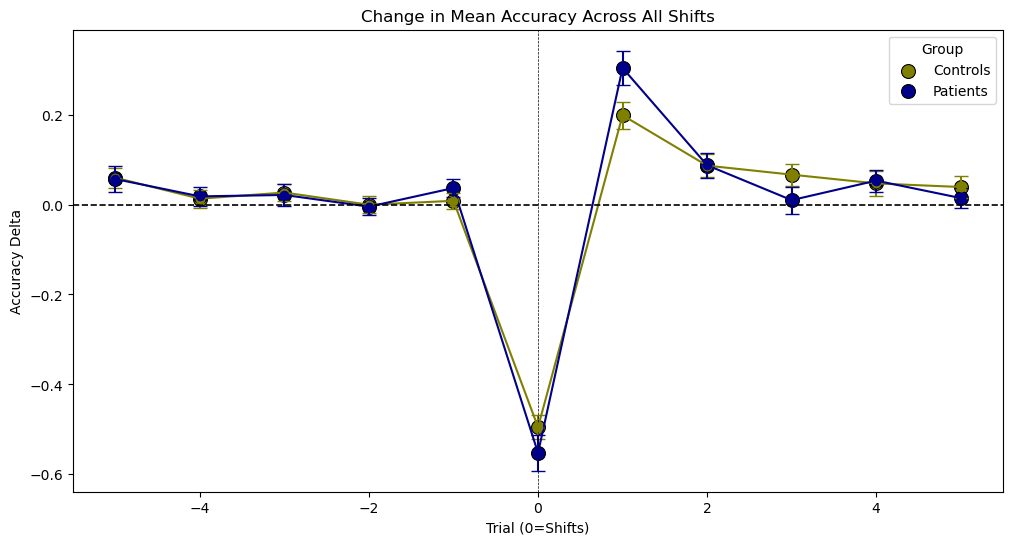

In [9]:
def plot_change_in_mean_var(summary_controls, summary_patients, measurevar, title, colors):
    """
    Plot the change in mean var across shifts for controls and patients.
    """
    # Add group labels
    summary_controls['patientstatus'] = 0
    summary_patients['patientstatus'] = 1
    
    # Combine datasets
    df_combined = pd.concat([summary_controls, summary_patients], ignore_index=True)
    
    # Create the plot
    plt.figure(figsize=(12, 6))
    
    for group in [0, 1]:
        subset = df_combined[df_combined['patientstatus'] == group]
        
        # Plot line and scatter points
        sns.lineplot(data=subset, x='nTrial_rel', y='mean', color=colors[group])
        sns.scatterplot(data=subset, x='nTrial_rel', y='mean', color=colors[group], edgecolor='black', s=100, label='Controls' if group == 0 else 'Patients')

        # Add error bars
        plt.errorbar(subset['nTrial_rel'], subset['mean'], yerr=subset['stderr'], fmt='o', color=colors[group], capsize=5)
    
    plt.axhline(0, color='black', linewidth=1.2, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
    plt.title(title)
    plt.xlabel('Trial (0=Shifts)')
    plt.ylabel('Accuracy Delta')
    plt.legend(title='Group')
    plt.show()


plot_change_in_mean_var(
    summary_controls['change_in_mean_accuracy'], 
    summary_patients['change_in_mean_accuracy'], 
    'change_in_mean_accuracy', 
    'Change in Mean Accuracy Across All Shifts', 
    colors = {0: 'olive', 1: 'darkblue'}
)


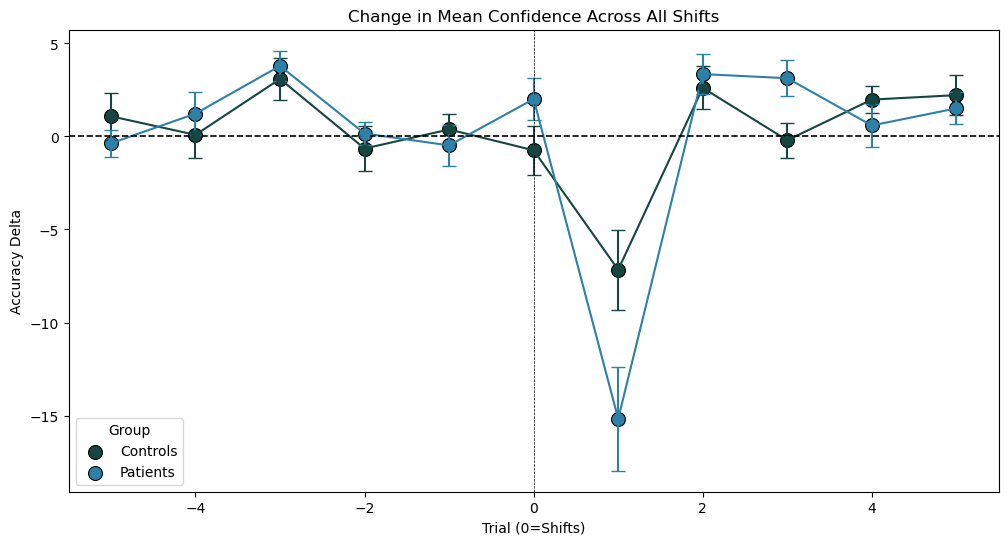

In [10]:
#confidence 
plot_change_in_mean_var(
    summary_controls['change_in_mean_confidence'], 
    summary_patients['change_in_mean_confidence'], 
    'change_in_mean_confidence', 
    'Change in Mean Confidence Across All Shifts',
     colors = {0: '#16463F', 1: '#2D80A7'}
)


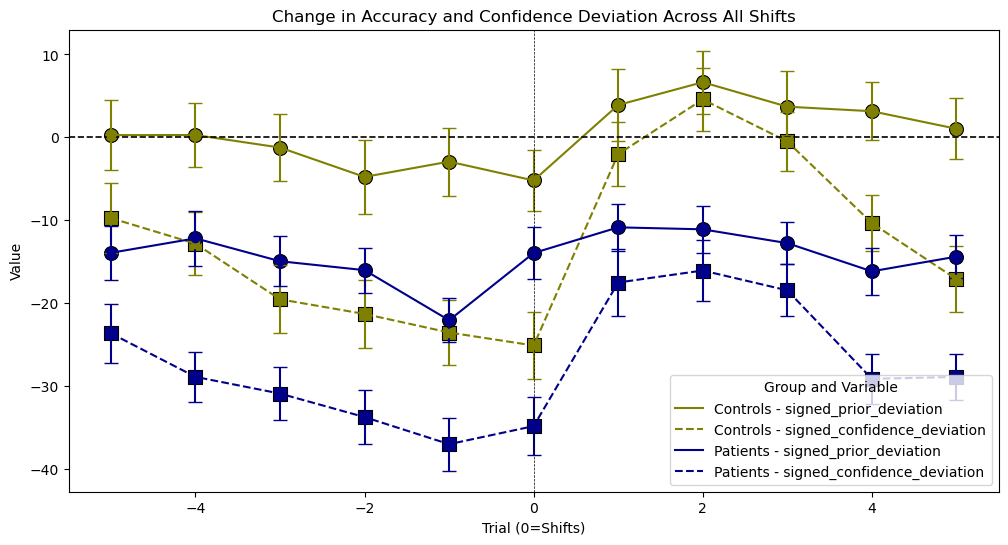

In [11]:
def plot_change_in_two_vars(summary_controls, summary_patients, var1, var2, title, colors):
    """
    Plot two variables across shifts for controls and patients with visual differentiation.
    
    Parameters:
    - summary_controls: Dictionary containing DataFrames for control group
    - summary_patients: Dictionary containing DataFrames for patient group
    - var1: The key for the first variable to plot (e.g., 'change_in_mean_accuracy')
    - var2: The key for the second variable to plot (e.g., 'signed_confidence_deviation')
    - title: Title of the plot
    - colors: Dictionary with colors for each group {0: 'color_for_controls', 1: 'color_for_patients'}
    """
    
    # Add group labels
    summary_controls[var1]['patientstatus'] = 0
    summary_patients[var1]['patientstatus'] = 1
    
    summary_controls[var2]['patientstatus'] = 0
    summary_patients[var2]['patientstatus'] = 1
    
    # Combine the datasets for both variables
    df_var1_combined = pd.concat([summary_controls[var1], summary_patients[var1]], ignore_index=True)
    df_var2_combined = pd.concat([summary_controls[var2], summary_patients[var2]], ignore_index=True)
    
    # Create the plot
    plt.figure(figsize=(12, 6))
    
    for group in [0, 1]:
        subset_var1 = df_var1_combined[df_var1_combined['patientstatus'] == group]
        subset_var2 = df_var2_combined[df_var2_combined['patientstatus'] == group]
        
        # Plot line and scatter points for the first variable (solid line, circle marker)
        sns.lineplot(data=subset_var1, x='nTrial_rel', y='mean', color=colors[group], linestyle='-', label=f"{'Controls' if group == 0 else 'Patients'} - {var1}")
        sns.scatterplot(data=subset_var1, x='nTrial_rel', y='mean', color=colors[group], edgecolor='black', s=100, marker='o')

        # Add error bars for the first variable
        plt.errorbar(subset_var1['nTrial_rel'], subset_var1['mean'], yerr=subset_var1['stderr'], fmt='o', color=colors[group], capsize=5)
        
        # Plot line and scatter points for the second variable (dashed line, square marker)
        sns.lineplot(data=subset_var2, x='nTrial_rel', y='mean', color=sns.light_palette(colors[group], 2)[1], linestyle='--', label=f"{'Controls' if group == 0 else 'Patients'} - {var2}")
        sns.scatterplot(data=subset_var2, x='nTrial_rel', y='mean', color=sns.light_palette(colors[group], 2)[1], edgecolor='black', s=100, marker='s')
        
        # Add error bars for the second variable
        plt.errorbar(subset_var2['nTrial_rel'], subset_var2['mean'], yerr=subset_var2['stderr'], fmt='s', color=sns.light_palette(colors[group], 2)[1], capsize=5)

    # Add horizontal and vertical reference lines
    plt.axhline(0, color='black', linewidth=1.2, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
    
    # Set title and labels
    plt.title(title)
    plt.xlabel('Trial (0=Shifts)')
    plt.ylabel('Value')
    
    # Create the legend
    plt.legend(title='Group and Variable')
    
    # Show the plot
    plt.show()


plot_change_in_two_vars(
    summary_controls,  # Dictionary for controls
    summary_patients,  # Dictionary for patients
    'signed_prior_deviation',  # First variable to plot
    'signed_confidence_deviation',  # Second variable to plot
    'Change in Accuracy and Confidence Deviation Across All Shifts', 
    colors={0: 'olive', 1: 'darkblue'}
)


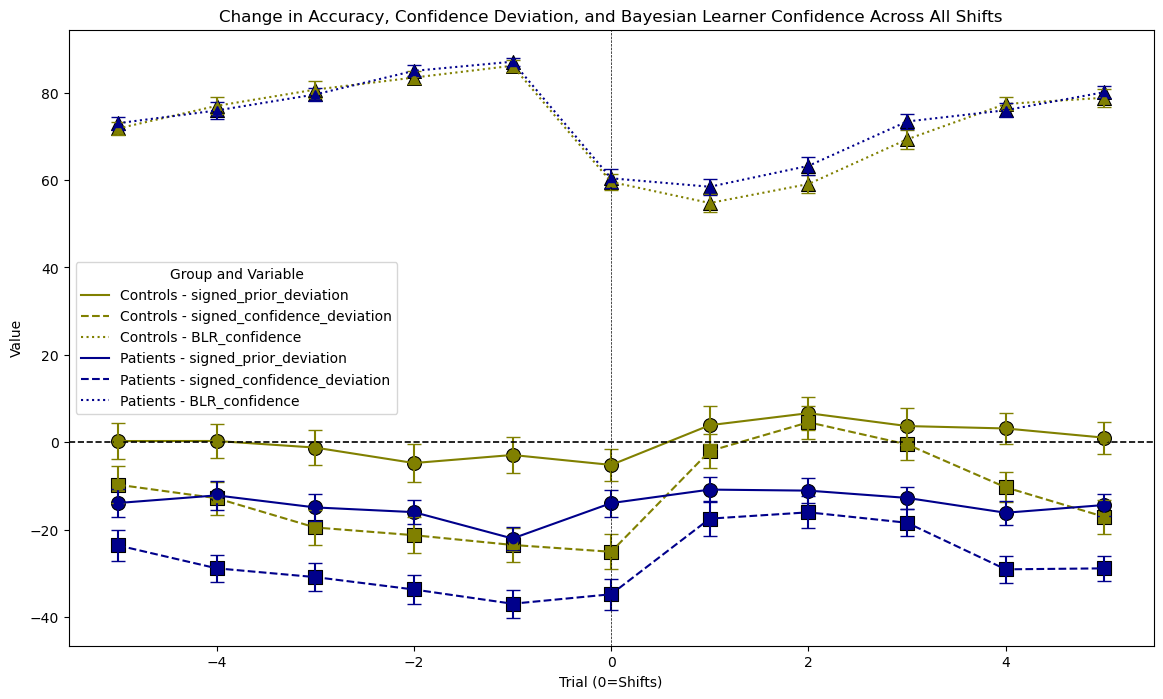

In [12]:
def plot_change_in_three_vars(summary_controls, summary_patients, var1, var2, var3, title, colors):
    """
    Plot three variables across shifts for controls and patients with visual differentiation.
    
    Parameters:
    - summary_controls: Dictionary containing DataFrames for control group
    - summary_patients: Dictionary containing DataFrames for patient group
    - var1: The key for the first variable to plot (e.g., 'change_in_mean_accuracy')
    - var2: The key for the second variable to plot (e.g., 'signed_confidence_deviation')
    - var3: The key for the third variable to plot (e.g., 'blr_confidence')
    - title: Title of the plot
    - colors: Dictionary with colors for each group {0: 'color_for_controls', 1: 'color_for_patients'}
    """
    
    # Add group labels to each variable dataset
    for var in [var1, var2, var3]:
        summary_controls[var]['patientstatus'] = 0
        summary_patients[var]['patientstatus'] = 1
    
    # Combine the datasets for the three variables
    df_var1_combined = pd.concat([summary_controls[var1], summary_patients[var1]], ignore_index=True)
    df_var2_combined = pd.concat([summary_controls[var2], summary_patients[var2]], ignore_index=True)
    df_var3_combined = pd.concat([summary_controls[var3], summary_patients[var3]], ignore_index=True)
    
    # Create the plot
    plt.figure(figsize=(14, 8))
    
    for group in [0, 1]:
        subset_var1 = df_var1_combined[df_var1_combined['patientstatus'] == group]
        subset_var2 = df_var2_combined[df_var2_combined['patientstatus'] == group]
        subset_var3 = df_var3_combined[df_var3_combined['patientstatus'] == group]
        
        # Plot line and scatter points for the first variable (solid line, circle marker)
        sns.lineplot(data=subset_var1, x='nTrial_rel', y='mean', color=colors[group], linestyle='-', label=f"{'Controls' if group == 0 else 'Patients'} - {var1}")
        sns.scatterplot(data=subset_var1, x='nTrial_rel', y='mean', color=colors[group], edgecolor='black', s=100, marker='o')

        # Add error bars for the first variable
        plt.errorbar(subset_var1['nTrial_rel'], subset_var1['mean'], yerr=subset_var1['stderr'], fmt='o', color=colors[group], capsize=5)
        
        # Plot line and scatter points for the second variable (dashed line, square marker)
        sns.lineplot(data=subset_var2, x='nTrial_rel', y='mean', color=sns.light_palette(colors[group], 2)[1], linestyle='--', label=f"{'Controls' if group == 0 else 'Patients'} - {var2}")
        sns.scatterplot(data=subset_var2, x='nTrial_rel', y='mean', color=sns.light_palette(colors[group], 2)[1], edgecolor='black', s=100, marker='s')
        
        # Add error bars for the second variable
        plt.errorbar(subset_var2['nTrial_rel'], subset_var2['mean'], yerr=subset_var2['stderr'], fmt='s', color=sns.light_palette(colors[group], 2)[1], capsize=5)

        # Plot line and scatter points for the third variable (dotted line, triangle marker)
        sns.lineplot(data=subset_var3, x='nTrial_rel', y='mean', color=sns.light_palette(colors[group], 3)[2], linestyle=':', label=f"{'Controls' if group == 0 else 'Patients'} - {var3}")
        sns.scatterplot(data=subset_var3, x='nTrial_rel', y='mean', color=sns.light_palette(colors[group], 3)[2], edgecolor='black', s=100, marker='^')
        
        # Add error bars for the third variable
        plt.errorbar(subset_var3['nTrial_rel'], subset_var3['mean'], yerr=subset_var3['stderr'], fmt='^', color=sns.light_palette(colors[group], 3)[2], capsize=5)

    # Add horizontal and vertical reference lines
    plt.axhline(0, color='black', linewidth=1.2, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
    
    # Set title and labels
    plt.title(title)
    plt.xlabel('Trial (0=Shifts)')
    plt.ylabel('Value')
    
    # Create the legend
    plt.legend(title='Group and Variable')
    
    # Show the plot
    plt.show()


plot_change_in_three_vars(
    summary_controls,  # Dictionary for controls
    summary_patients,  # Dictionary for patients
    'signed_prior_deviation',  # First variable to plot
    'signed_confidence_deviation',  # Second variable to plot
    'BLR_confidence',  # Third variable to plot
    'Change in Accuracy, Confidence Deviation, and Bayesian Learner Confidence Across All Shifts', 
    colors={0: 'olive', 1: 'darkblue'}
)
